In [17]:
import lightgbm as lgb
import matplotlib.pyplot
import pandas as pd

In [18]:
model_path = "../models/lgbm_optuna.txt"
data_path = "../data/processed/test.csv"

In [19]:
model = lgb.Booster(model_file=model_path)
df = pd.read_csv(data_path)

In [20]:
df

,Unnamed: 0,Country,StockCode,Year,Month,Day,Hour,min,sec,is_weekend,target
0,363675,United Kingdom,0.380722,2010,9,30,8,59,0,0,1
1,363676,United Kingdom,0.160553,2010,9,30,8,59,0,0,0
2,363677,United Kingdom,0.192718,2010,9,30,8,59,0,0,0
3,363678,United Kingdom,0.411506,2010,9,30,8,59,0,0,1
4,363679,United Kingdom,0.400548,2010,9,30,8,59,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
703691,1067366,France,0.114372,2011,12,9,12,50,0,0,0
703692,1067367,France,0.181564,2011,12,9,12,50,0,0,0
703693,1067368,France,0.149983,2011,12,9,12,50,0,0,0
703694,1067369,France,0.230310,2011,12,9,12,50,0,0,0


In [21]:
enc = df['StockCode'].value_counts()
df['StockCode_Freq'] = df['StockCode'].map(enc)

# NOW drop StockCode
df.drop(columns=['StockCode'], inplace=True)

In [22]:
df.drop(columns=["Unnamed: 0"] , inplace=True)

In [23]:
X = df.drop(columns= ["target"])
y = df["target"]

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703696 entries, 0 to 703695
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Country         703696 non-null  object
 1   Year            703696 non-null  int64 
 2   Month           703696 non-null  int64 
 3   Day             703696 non-null  int64 
 4   Hour            703696 non-null  int64 
 5   min             703696 non-null  int64 
 6   sec             703696 non-null  int64 
 7   is_weekend      703696 non-null  int64 
 8   StockCode_Freq  703696 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 48.3+ MB


In [25]:
X.columns

Index(['Country', 'Year', 'Month', 'Day', 'Hour', 'min', 'sec', 'is_weekend',
       'StockCode_Freq'],
      dtype='object')

In [26]:
# Convert Country to categorical type (matching training)
X['Country'] = X['Country'].astype('category')


In [27]:
predictions = model.predict(X)

In [28]:
predictions = (predictions >= 0.5).astype(int)

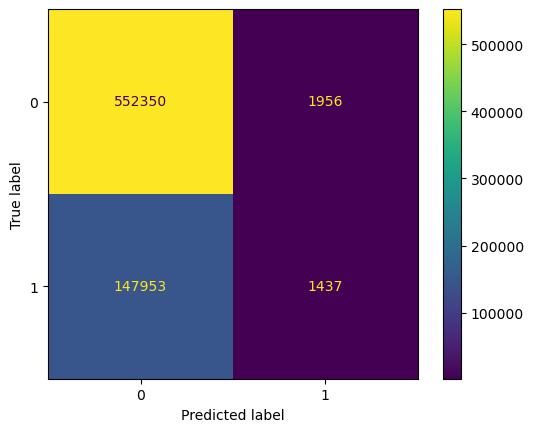

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Generate the matrix
# y_true are your actual labels, y_pred are your model's guesses
cm = confusion_matrix(y, predictions)

# 2. Visualize it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y , predictions)

0.7869690889247629